Notes: 100 staff avail of the flu vaccine at their place of work. Record the department they work in, their age, their gender and whether they report contracting flu that year or not. 

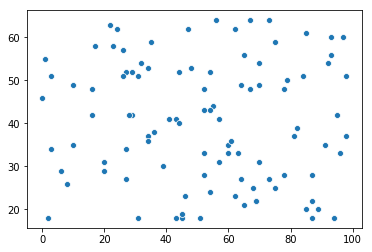

In [133]:
import pandas as pd  
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
 
staff = np.random.choice(101, 100) #generates an array of 100 numbers between 1 and 100
staff_ages = np.random.randint(18, 65, 100)#generates an array of 100 numbers between 18 and 65
sns.scatterplot(staff, staff_ages)


In [158]:
department = (["Accounts", "Engineering", "Administration", "Facilities"])
np.random.shuffle(department) 
#need to assign 25 variables from "staff" to the 4 departments and create a dataframe of these values
df = pd.DataFrame(np.random.choice(100), index=department, columns=list('A'))
print(df)

                 A
Administration  87
Engineering     87
Facilities      87
Accounts        87
